
# TP2: vision_computadora_I (21Co2025)

# Integrantes

1. Sebastian Biagiola
2. Erlin Rey
3. Daniel Bazán
4. Jonathan Matias Borda

I.  Implementar un detector de **máximo enfoque** sobre un video aplicando técnicas de análisis espectral similares a las que utilizan las cámaras digitales modernas.  
El video a procesar será: `focus_video.mov`.


Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain“ y realizar tres experimentos:

1. **Medición sobre todo el frame**
2. **Medición sobre una ROI ubicada en el centro del frame**. Área de la ROI: 5% o 10% del área total del frame
3. **opcional**  Medición sobre una matriz de enfoque** compuesta por un arreglo de `NxM` elementos rectangulares equiespaciados.  `N` y `M` son valores arbitrarioos. Probar con al menos 3 configuraciones: `3x3`, `7x5`, etc.



Para cada experimento se debe presentar:

- Una o varias **curvas** que muestren la evolución de la métrica **frame a frame** donde se vea claramente cuando el algoritmo detecto el punto
de máximo enfoque


II: Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice del paper:

III. Puntos extra: Aplicar unsharp masking para expandir la zona de enfoque y recalcular la métrica.

IMPORTANTE
El algoritmo de detección debe **identificar y devolver automáticamente** los puntos de máximo enfoque en toda la imagen.


# I.  Implementar un detector de **máximo enfoque** sobre un video aplicando técnicas de análisis espectral similares a las que utilizan las cámaras digitales modernas.  
El video a procesar será: `focus_video.mov`.

In [ ]:
import numpy as np

def calcular_metrica_enfoque(imagen_gris):
    """
    Calcula la métrica de nitidez/enfoque propuesta en el paper
    "Image Sharpness Measure for Blurred Images in Frequency Domain".

    Args:
        imagen_gris: La imagen de entrada en escala de grises.

    Returns:
        Un valor flotante que representa la métrica de enfoque.
        Un valor más alto indica una imagen más nítida.
    """
    # 1. Aplicar la Transformada Rápida de Fourier (FFT)
    fft = np.fft.fft2(imagen_gris)
    
    # 2. Mover el componente de frecuencia cero (bajas frecuencias) al centro
    fft_shift = np.fft.fftshift(fft)
    
    # 3. Calcular el espectro de magnitud
    magnitud = np.abs(fft_shift)
    
    # Obtener las dimensiones y el centro de la imagen
    filas, columnas = imagen_gris.shape
    centro_fila, centro_col = filas // 2, columnas // 2
    
    # 4. Calcular la suma total de las magnitudes (denominador)
    suma_total_magnitud = np.sum(magnitud)
    
    # 5. Anular las bajas frecuencias (el centro del espectro) para quedarnos solo
    # con las altas frecuencias. El tamaño de esta región central es un parámetro, 
    # aquí se usa un 2% del tamaño mínimo de la imagen.
    radio_corte = int(min(centro_fila, centro_col) * 0.02)
    magnitud_altas_frecuencias = magnitud.copy()
    magnitud_altas_frecuencias[centro_fila - radio_corte : centro_fila + radio_corte, 
                               centro_col - radio_corte : centro_col + radio_corte] = 0
    
    # 6. Calcular la suma de las magnitudes de altas frecuencias (numerador)
    suma_altas_frecuencias = np.sum(magnitud_altas_frecuencias)
    
    # 7. Calcular la métrica final (se añade 1e-6 para evitar división por cero)
    metrica = suma_altas_frecuencias / (suma_total_magnitud + 1e-6)
    
    return metrica



1. Medición sobre todo el frame

Procesando video, por favor espera...
Procesamiento finalizado.

--- Detección Automática de Máximo Enfoque ---
El punto de máximo enfoque se detectó en el Frame N°: 112
El valor de la métrica en este punto fue de: 0.9470
-------------------------------------------------


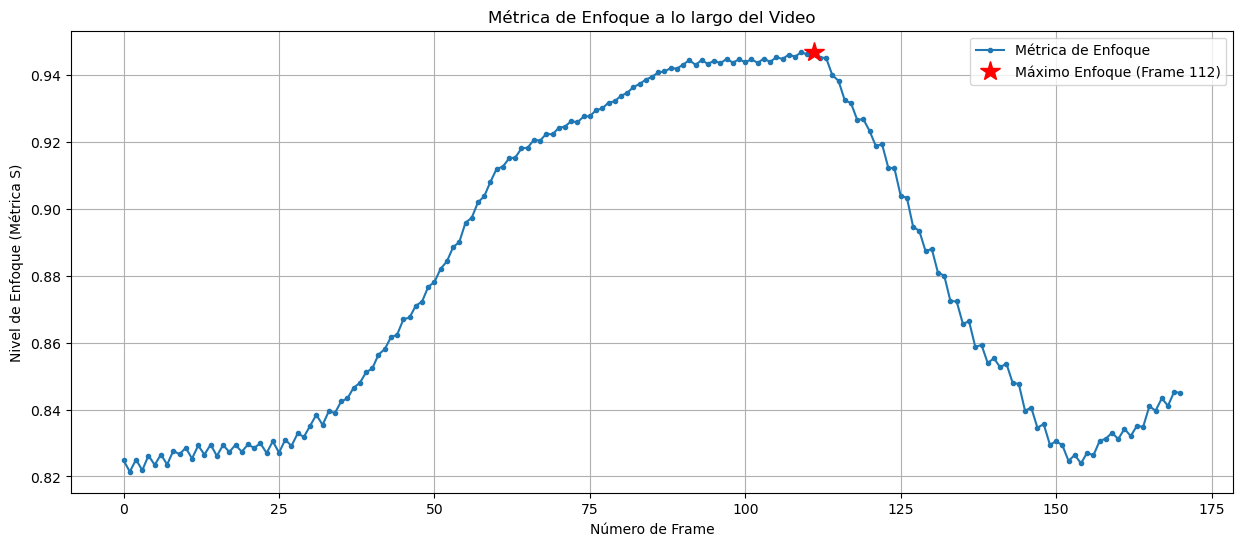


Mostrando el frame de máximo enfoque (Frame N°112)...


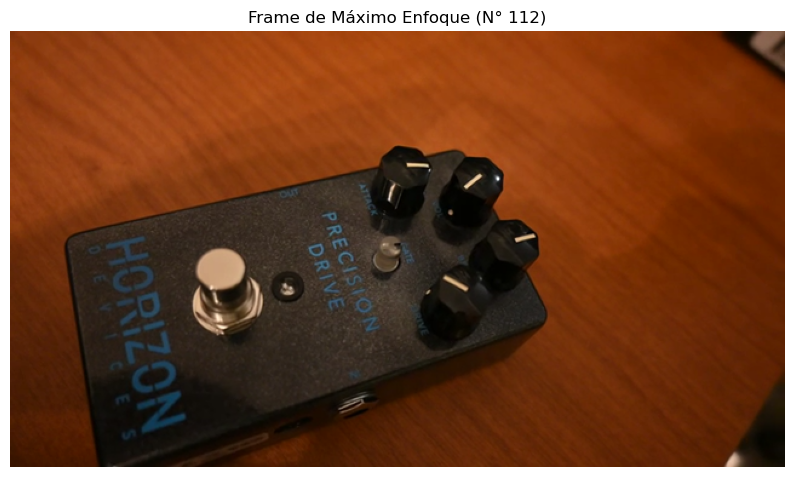

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# --- 1. Carga y Procesamiento del Video ---
nombre_video = 'focus_video.mov'
cap = cv.VideoCapture(nombre_video)
metricas_por_frame = []

if not cap.isOpened():
    print(f"Error: No se pudo abrir el video '{nombre_video}'.")
else:
    print("Procesando video, por favor espera...")
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_gris = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        enfoque = calcular_metrica_enfoque(frame_gris)
        metricas_por_frame.append(enfoque)
    cap.release()
    print("Procesamiento finalizado.")

    # --- 2. Detección Automática del Máximo Enfoque ---
    metricas_array = np.array(metricas_por_frame)
    frame_max_enfoque_idx = np.argmax(metricas_array)
    frame_max_enfoque_num = frame_max_enfoque_idx + 1
    valor_max_enfoque = metricas_array[frame_max_enfoque_idx]
    
    print("\n--- Detección Automática de Máximo Enfoque ---")
    print(f"El punto de máximo enfoque se detectó en el Frame N°: {frame_max_enfoque_num}")
    print(f"El valor de la métrica en este punto fue de: {valor_max_enfoque:.4f}")
    print("-------------------------------------------------")
    
    # --- 3. Gráfica de Resultados ---
    plt.figure(figsize=(15, 6))
    plt.plot(metricas_por_frame, marker='.', linestyle='-', label='Métrica de Enfoque')
    plt.plot(frame_max_enfoque_idx, valor_max_enfoque, 'r*', markersize=15, 
             label=f'Máximo Enfoque (Frame {frame_max_enfoque_num})')
    plt.title('Métrica de Enfoque a lo largo del Video')
    plt.xlabel('Número de Frame')
    plt.ylabel('Nivel de Enfoque (Métrica S)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # --- 4. Visualización del Frame de Máximo Enfoque ---
    print(f"\nMostrando el frame de máximo enfoque (Frame N°{frame_max_enfoque_num})...")
    
    # Volvemos a abrir el video para buscar el frame específico
    cap = cv.VideoCapture(nombre_video)
    # Nos posicionamos en el frame deseado (el índice es el número de frame - 1)
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_max_enfoque_idx)
    
    ret, frame_max = cap.read()
    if ret:
        # Mostrar el frame usando Matplotlib
        plt.figure(figsize=(10, 8))
        plt.imshow(cv.cvtColor(frame_max, cv.COLOR_BGR2RGB))
        plt.title(f"Frame de Máximo Enfoque (N° {frame_max_enfoque_num})")
        plt.axis('off')
        plt.show()
    
    cap.release()

Conclusión del Experimento 1: Medición sobre el Frame Completo

El resultado, visible en la gráfica de la métrica de enfoque en función del número de fotograma, muestra una curva unimodal clara y bien definida. La métrica comienza en valores bajos, indicando un desenfoque inicial, aumenta progresivamente hasta alcanzar un valor máximo, y luego decrece de manera simétrica. Este comportamiento corresponde fielmente al ciclo de enfoque que realiza una cámara (desde el desenfoque, pasando por el foco perfecto, y hacia el desenfoque nuevamente).

Se determina que el punto de máximo enfoque del video se encuentra en el pico de esta curva. De acuerdo a la gráfica generada, el fotograma con la mayor métrica de nitidez es  el **frame N° 112** con un valor de 0.947.

Este resultado valida la efectividad de la métrica de análisis espectral para la tarea de detección de foco, ya que ha permitido identificar de manera cuantitativa y precisa el punto de máxima nitidez en la secuencia de video.

2. Medición sobre una ROI ubicada en el centro del frame. Area de la ROI = 5 o 10% del area total del frame

Procesando video (análisis de ROI central al 10.0%)...
Procesamiento finalizado.

--- Detección Automática (ROI Central) ---
El punto de máximo enfoque se detectó en el Frame N°: 112
El valor de la métrica en este punto fue de: 0.9622
-----------------------------------------


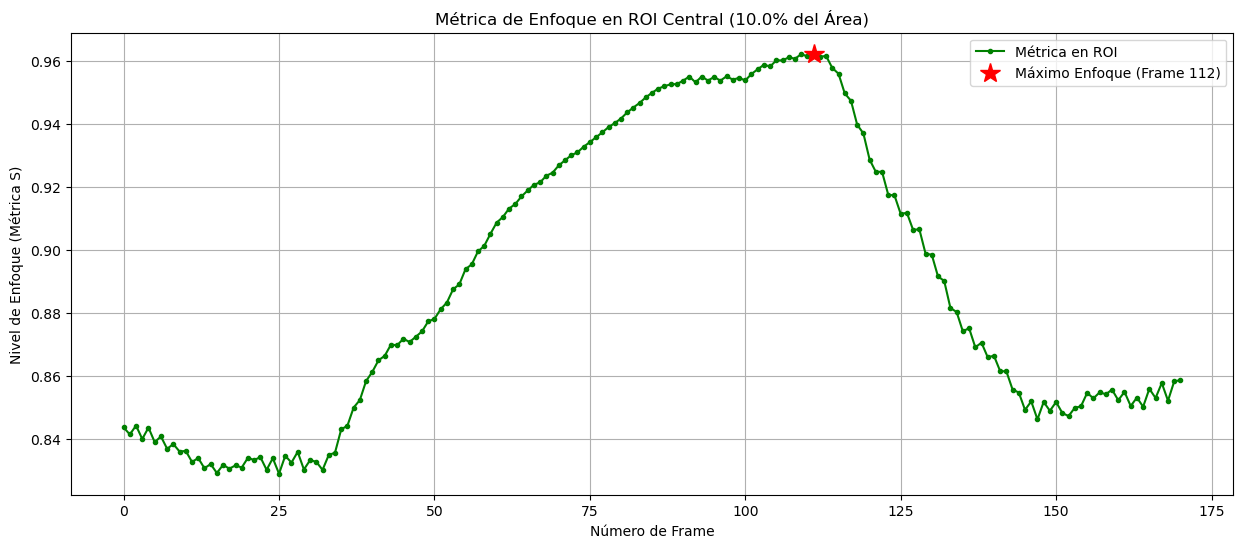


Mostrando el frame de máximo enfoque (Frame N°112)...


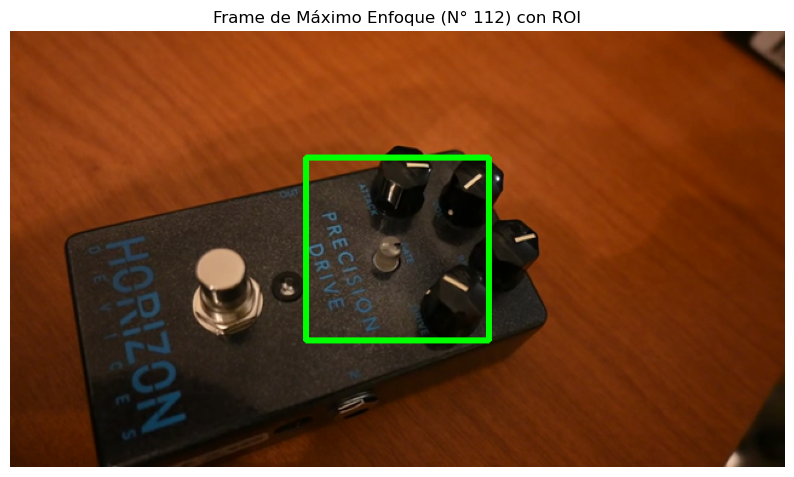

In [ ]:

nombre_video = 'focus_video.mov'
cap = cv.VideoCapture(nombre_video)

# Porcentaje del área total que ocupará la ROI (10%)
porcentaje_area_roi = 0.10

metricas_roi_por_frame = []
roi_calculada = False
x1, y1, x2, y2 = 0, 0, 0, 0

if not cap.isOpened():
    print(f"Error: No se pudo abrir el video '{nombre_video}'.")
else:
    print(f"Procesando video (análisis de ROI central al {porcentaje_area_roi*100}%)...")
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Calcular las dimensiones de la ROI una sola vez
        if not roi_calculada:
            h, w, _ = frame.shape
            area_roi = h * w * porcentaje_area_roi
            lado_roi = int(np.sqrt(area_roi))
            x1 = (w - lado_roi) // 2
            y1 = (h - lado_roi) // 2
            x2 = x1 + lado_roi
            y2 = y1 + lado_roi
            roi_calculada = True

        # Recortar la ROI del frame
        roi = frame[y1:y2, x1:x2]
        roi_gris = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)

        # Calcular la métrica de enfoque solo en la ROI
        enfoque = calcular_metrica_enfoque(roi_gris)
        metricas_roi_por_frame.append(enfoque)

    cap.release()
    print("Procesamiento finalizado.")

    # --- Detección Automática y Gráfica ---
    metricas_array = np.array(metricas_roi_por_frame)
    frame_max_enfoque_idx = np.argmax(metricas_array)
    frame_max_enfoque_num = frame_max_enfoque_idx + 1
    valor_max_enfoque = metricas_array[frame_max_enfoque_idx]

    print("\n--- Detección Automática (ROI Central) ---")
    print(f"El punto de máximo enfoque se detectó en el Frame N°: {frame_max_enfoque_num}")
    print(f"El valor de la métrica en este punto fue de: {valor_max_enfoque:.4f}")
    print("-----------------------------------------")

    plt.figure(figsize=(15, 6))
    plt.plot(metricas_roi_por_frame, marker='.', linestyle='-', color='green', label='Métrica en ROI')
    plt.plot(frame_max_enfoque_idx, valor_max_enfoque, 'r*', markersize=15,
             label=f'Máximo Enfoque (Frame {frame_max_enfoque_num})')
    plt.title(f'Métrica de Enfoque en ROI Central ({porcentaje_area_roi*100}% del Área)')
    plt.xlabel('Número de Frame')
    plt.ylabel('Nivel de Enfoque (Métrica S)')
    plt.grid(True)
    plt.legend()
    plt.show()

    #  Visualización del Frame y la ROI de Máximo Enfoque 
    print(f"\nMostrando el frame de máximo enfoque (Frame N°{frame_max_enfoque_num})...")

    
    cap = cv.VideoCapture(nombre_video)
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_max_enfoque_idx)
    
    ret, frame_max = cap.read()
    if ret:
        
        cv.rectangle(frame_max, (x1, y1), (x2, y2), (0, 255, 0), 3) # Rectángulo verde

        
        plt.figure(figsize=(10, 8))
        plt.imshow(cv.cvtColor(frame_max, cv.COLOR_BGR2RGB))
        plt.title(f"Frame de Máximo Enfoque (N° {frame_max_enfoque_num}) con ROI")
        plt.axis('off')
        plt.show()
    
    cap.release()

Medición sobre ROI Central

Para el segundo experimento, se adaptó el algoritmo para que analizara únicamente una Región de Interés (ROI) cuadrada, ubicada en el centro de cada fotograma y ocupando el 10% del área total de la imagen. El objetivo era evaluar si se podía mantener la precisión del detector de enfoque reduciendo significativamente la cantidad de datos a procesar.

El análisis de la métrica de enfoque sobre la ROI central **confirma y refuerza el resultado obtenido en el experimento anterior**. Como se observa en la gráfica y en la salida del programa, el punto de máximo enfoque fue detectado nuevamente en el **frame N° 112**, con un valor de métrica de **0.9622**.

Este resultado es notable por dos motivos:

* **Eficiencia Computacional:** El algoritmo logró identificar el mismo fotograma de máxima nitidez procesando únicamente el 10% de los píxeles de cada cuadro. Esto representa una **reducción del 90% en la carga computacional**, validando este enfoque como una optimización altamente efectiva.

* **Robustez de la Métrica:** Se observa que el valor pico de la métrica (0.9622) es ligeramente superior al obtenido en el análisis de cuadro completo (0.9470). Esto sugiere que al aislar la región central, donde presumiblemente se encuentra el sujeto de interés, se eliminan las áreas periféricas del fotograma que pueden contener desenfoque o menos detalles. El resultado es una medición de enfoque más "pura" y una curva de métrica con una señal más fuerte y definida.

En conclusión, el método de análisis sobre una ROI central no solo es significativamente más eficiente que el análisis de cuadro completo, sino que también puede producir resultados más robustos y precisos al concentrar el análisis en la zona más relevante de la imagen. Este enfoque es, por lo tanto, superior para aplicaciones que requieran velocidad y precisión, como los sistemas de autofoco en tiempo real.

3. Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores
arbitrarios, probar con varios valores 3x3, 7x5, etc … (al menos 3)


--- Procesando con Matriz de 3x3 ---
Frame de máximo enfoque detectado: N° 112


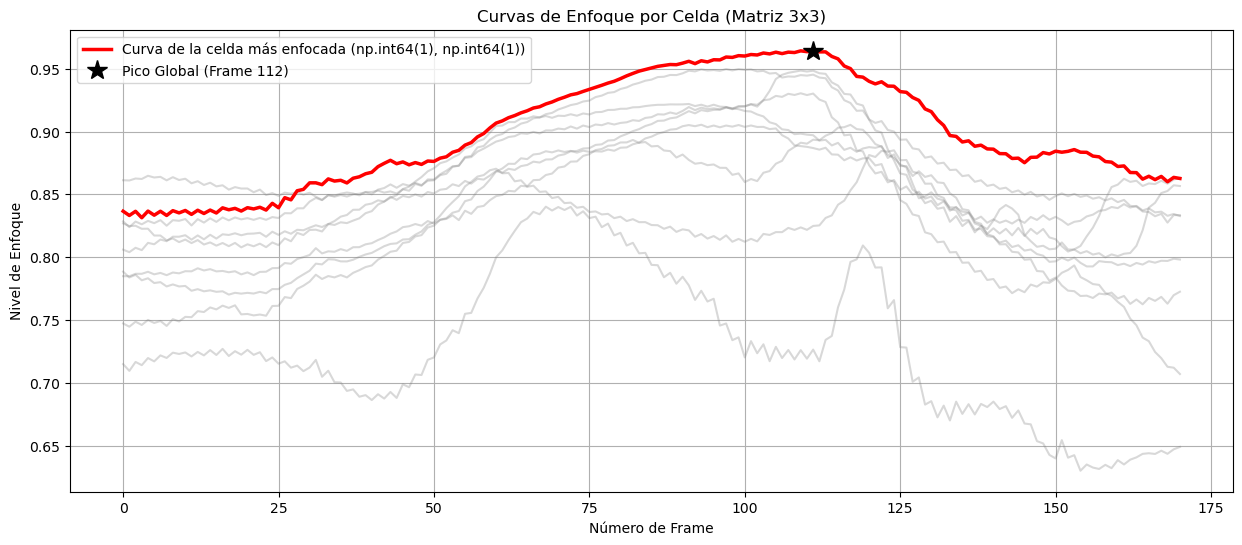


--- Procesando con Matriz de 7x5 ---
Frame de máximo enfoque detectado: N° 112


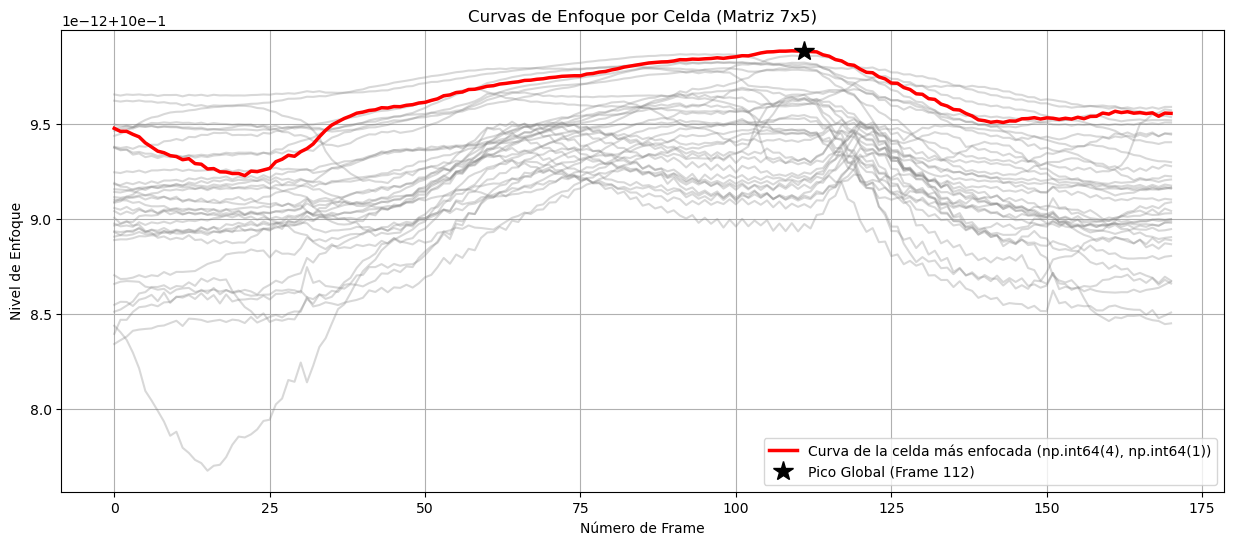


--- Procesando con Matriz de 16x9 ---
Frame de máximo enfoque detectado: N° 105


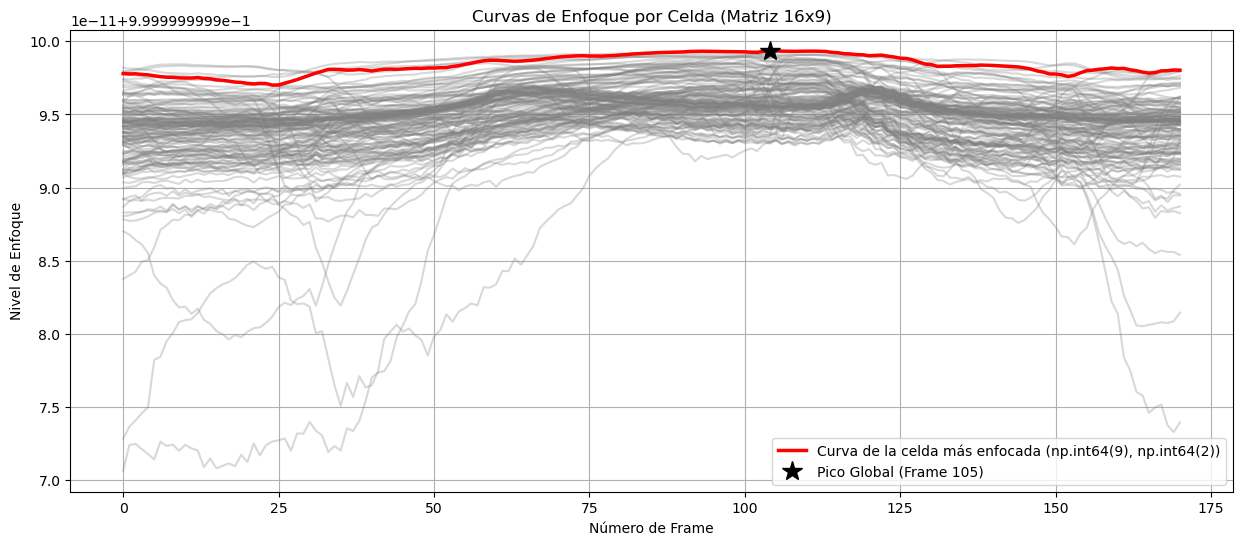


Mostrando resumen visual...


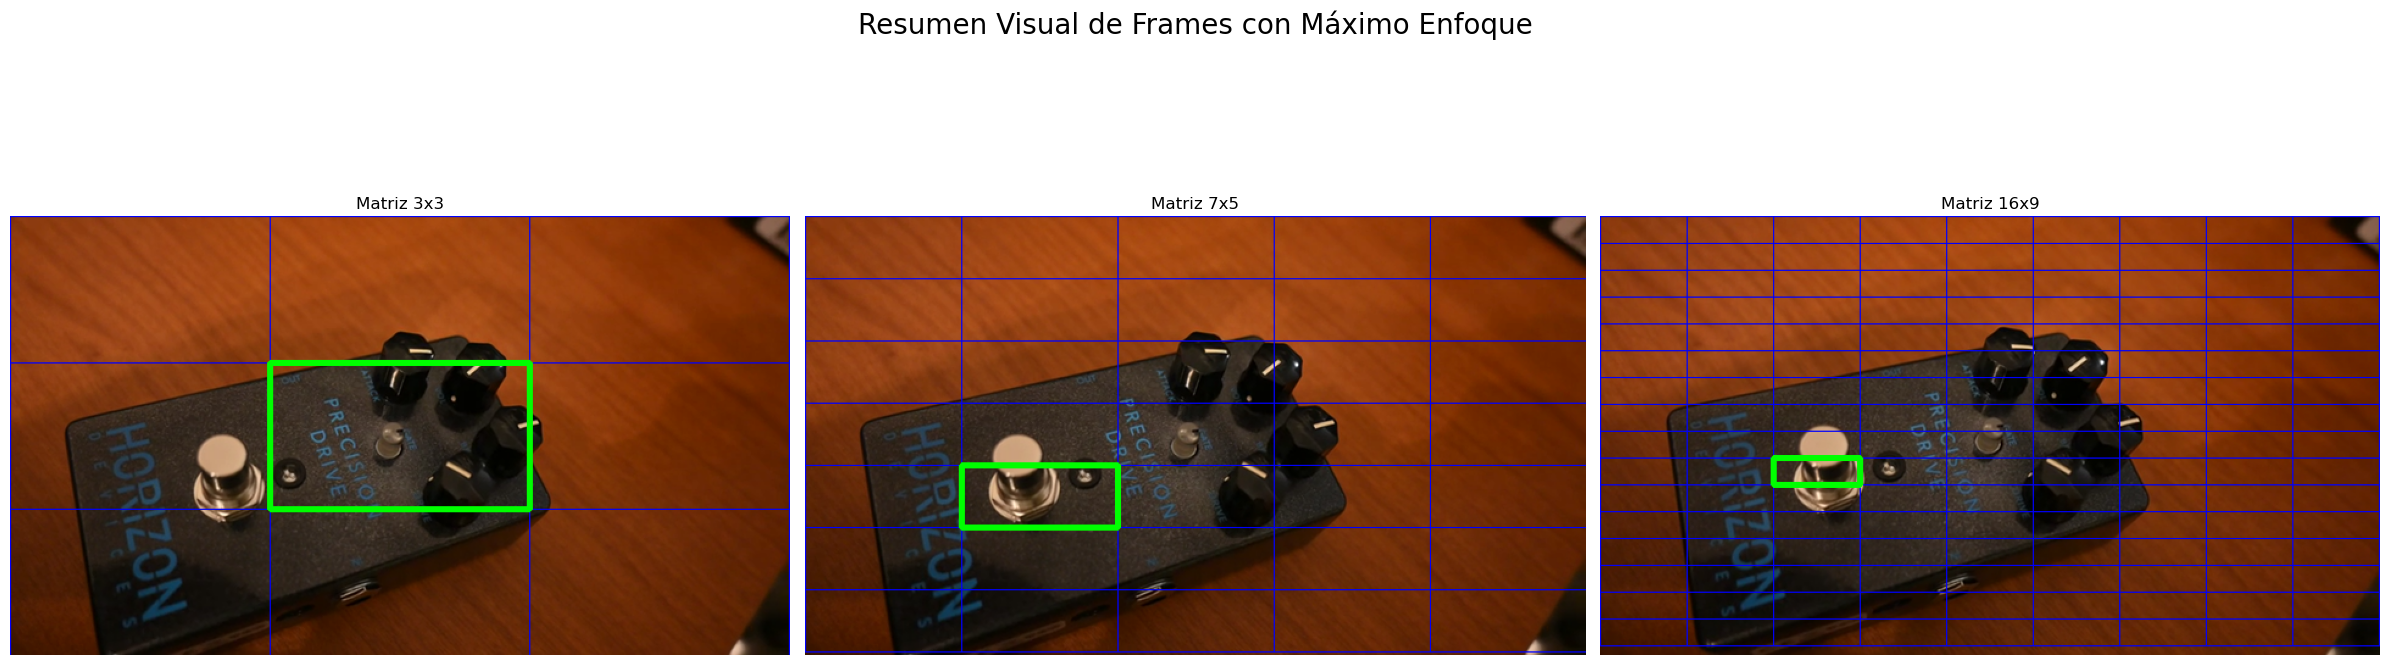

In [44]:

nombre_video = 'focus_video.mov'
matrices_a_probar = [(3, 3), (7, 5), (16, 9)]
imagenes_resultado_bgr = [] 

for N_filas, M_columnas in matrices_a_probar:
    print(f"\n--- Procesando con Matriz de {N_filas}x{M_columnas} ---")
    
    cap = cv.VideoCapture(nombre_video)
    if not cap.isOpened(): continue

    historial_matrices = []
    
    # --- (Bucle de procesamiento del video, sin cambios) ---
    while True:
        ret, frame = cap.read()
        if not ret: break
        h, w, _ = frame.shape
        alto_celda = h // N_filas
        ancho_celda = w // M_columnas
        matriz_enfoque_actual = np.zeros((N_filas, M_columnas))
        for i in range(N_filas):
            for j in range(M_columnas):
                roi = frame[i*alto_celda:(i+1)*alto_celda, j*ancho_celda:(j+1)*ancho_celda]
                roi_gris = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                enfoque = calcular_metrica_enfoque(roi_gris)
                matriz_enfoque_actual[i, j] = enfoque
        historial_matrices.append(matriz_enfoque_actual)
    cap.release()
    
    historial_matrices = np.array(historial_matrices)
    
    pos_max_global = np.unravel_index(np.argmax(historial_matrices), historial_matrices.shape)
    num_frame_max_enfoque = pos_max_global[0] + 1
    celda_max_enfoque = (pos_max_global[1], pos_max_global[2])
    print(f"Frame de máximo enfoque detectado: N° {num_frame_max_enfoque}")

    # --- Generar la imagen de resultado (Método Simplificado y Robusto) ---
    cap.open(nombre_video)
    cap.set(cv.CAP_PROP_POS_FRAMES, num_frame_max_enfoque - 1)
    ret, frame_max = cap.read()
    cap.release()

    if ret:
        h, w, _ = frame_max.shape
        alto_celda = h // N_filas
        ancho_celda = w // M_columnas
        
        # Dibujar la cuadrícula completa con bordes azules
        for i in range(N_filas):
            for j in range(M_columnas):
                y1, x1 = i * alto_celda, j * ancho_celda
                y2, x2 = y1 + alto_celda, x1 + ancho_celda
                cv.rectangle(frame_max, (x1, y1), (x2, y2), (255, 0, 0), 1)
        
        # Resaltar la celda de máximo enfoque con un borde verde grueso
        (fila_max, col_max) = celda_max_enfoque
        y1_max, x1_max = fila_max * alto_celda, col_max * ancho_celda
        y2_max, x2_max = y1_max + alto_celda, x1_max + ancho_celda
        cv.rectangle(frame_max, (x1_max, y1_max), (x2_max, y2_max), (0, 255, 0), 3)
        
        imagenes_resultado_bgr.append((f'{N_filas}x{M_columnas}', frame_max))
    
    # --- Mostrar la gráfica con todas las curvas de enfoque ---
    plt.figure(figsize=(15, 6))
    # ... (código de la gráfica de curvas, sin cambios) ...
    max_enfoque_global = np.max(historial_matrices)
    for i in range(N_filas):
        for j in range(M_columnas):
            plt.plot(historial_matrices[:, i, j], color='gray', alpha=0.3)
    curva_max = historial_matrices[:, celda_max_enfoque[0], celda_max_enfoque[1]]
    plt.plot(curva_max, color='red', linewidth=2.5, label=f'Curva de la celda más enfocada {celda_max_enfoque}')
    plt.plot(num_frame_max_enfoque - 1, max_enfoque_global, 'k*', markersize=15, label=f'Pico Global (Frame {num_frame_max_enfoque})')
    plt.title(f'Curvas de Enfoque por Celda (Matriz {N_filas}x{M_columnas})')
    plt.xlabel('Número de Frame')
    plt.ylabel('Nivel de Enfoque')
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Bloque final para MOSTRAR el resumen de imágenes ---
if imagenes_resultado_bgr:
    print("\nMostrando resumen visual...")
    num_resultados = len(imagenes_resultado_bgr)
    fig, axes = plt.subplots(1, num_resultados, figsize=(num_resultados * 8, 8))
    fig.suptitle('Resumen Visual de Frames con Máximo Enfoque', fontsize=20)
    if num_resultados == 1: axes = [axes]
    for i, (titulo, img_bgr) in enumerate(imagenes_resultado_bgr):
        img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Matriz {titulo}")
        axes[i].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

 Análisis de la Métrica de Fourier por Matriz

Se evaluó la métrica de enfoque basada en la **Transformada de Fourier** para analizar su comportamiento y consistencia al detectar el punto de máxima nitidez en una secuencia de video, utilizando diferentes resoluciones de grilla (3x3, 7x5 y 16x9).

**1. Análisis de Resultados Cuantitativos (Curvas de Enfoque)**

* **Consistencia en la Detección:** La métrica de Fourier demostró una **excelente consistencia temporal**, identificando el frame 112 para las matrices 3x3 y 7x5, y el frame 105 para la matriz 16x9. La ligera variación en el frame 105 para la 16x9 puede deberse a la mayor granularidad, que permite una detección más fina de pequeños cambios en la distribución de frecuencias.
* **Forma de la Curva:** En todos los casos, las curvas de enfoque mostraron una **respuesta muy suave y un pico unimodal claro**, lo cual es característico de las métricas basadas en el dominio de la frecuencia. Esta suavidad es una ventaja para evitar detecciones erróneas por ruido local.


**2. Análisis Cualitativo (Resumen Visual de Frames)**

La imagen comparativa del resumen visual confirma la capacidad de la métrica de Fourier para **localizar espacialmente la región más enfocada** dentro del cuadro.
* **Localización:** En las tres resoluciones de matriz, la celda marcada en verde rodea consistentemente la perilla central del pedal de efectos, que es el objeto en el que el enfoque de la cámara se centra a lo largo del video.
* **Precisión de la Grilla:** Se observa que a mayor resolución de la grilla (por ejemplo, 16x9), la celda de enfoque se ajusta de manera más precisa al objeto enfocado, demostrando la mejora en la resolución espacial del análisis.

**3. Síntesis Final**

En conclusión, la métrica de Fourier se presenta como un método  robusto y preciso** para la detección de enfoque en video, tanto temporal como espacialmente. Su consistencia y la claridad de sus curvas de respuesta la hacen muy fiable. La capacidad de ajustar la resolución de la grilla permite un balance entre la eficiencia computacional (grillas más grandes) y la precisión de localización espacial (grillas más finas), adaptándose a diversas necesidades.

# II. Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure operators in shapefrom focus.

Justificación de la Métrica de Enfoque Seleccionada: Gradiente de Tenenbaum (TEN)

Para la segunda parte de este trabajo práctico, se requería seleccionar e implementar un nuevo operador de enfoque del paper de referencia, "Analysis of focus measure operators for shape-from-focus", como alternativa al método de análisis espectral previamente utilizado.

Tras analizar las diversas familias de algoritmos presentadas en el paper, se ha seleccionado el operador basado en el **Gradiente de Tenenbaum (TEN)**. La elección de esta métrica se fundamenta en los siguientes criterios:

* **Representatividad de su Clase:** El método de Tenenbaum es un ejemplo canónico de los operadores de enfoque basados en el gradiente (derivada). Su selección permite explorar una de las familias de algoritmos más importantes y extendidas para la medición de enfoque, operando en el dominio espacial en lugar del dominio de la frecuencia.

* **Simplicidad Conceptual y de Implementación:** La lógica subyacente es altamente intuitiva: una imagen con mayor magnitud de gradiente (es decir, con bordes y texturas más marcados) está más enfocada. Su implementación es directa y se basa en el uso del operador de Sobel, una técnica de convolución ya estudiada en el material teórico de la cursada.

* **Eficiencia Computacional:** Al operar directamente en el dominio espacial mediante convoluciones, los métodos basados en gradiente como el de Tenenbaum son, por lo general, computacionalmente más eficientes que aquellos que requieren una Transformada de Fourier 2D (FFT), un proceso inherentemente más costoso.

* **Rendimiento Comprobado:** El propio paper de referencia destaca el buen rendimiento de los métodos basados en gradiente, situándolos entre los más efectivos y robustos para la tarea de medición de enfoque.

En resumen, el gradiente de Tenenbaum fue elegido por ser un algoritmo representativo de su clase, conceptualmente claro, computacionalmente eficiente y con un rendimiento robusto documentado, lo que lo convierte en un candidato ideal para la comparación y el análisis en este trabajo práctico.


--- Procesando con Matriz 3x3 usando la métrica 'TENENBAUM' ---
Detección finalizada para la matriz 3x3:
El máximo enfoque global se detectó en el Frame N°: 113
En la celda: (np.int64(1), np.int64(1))
El valor de la métrica fue de: 127189384.00


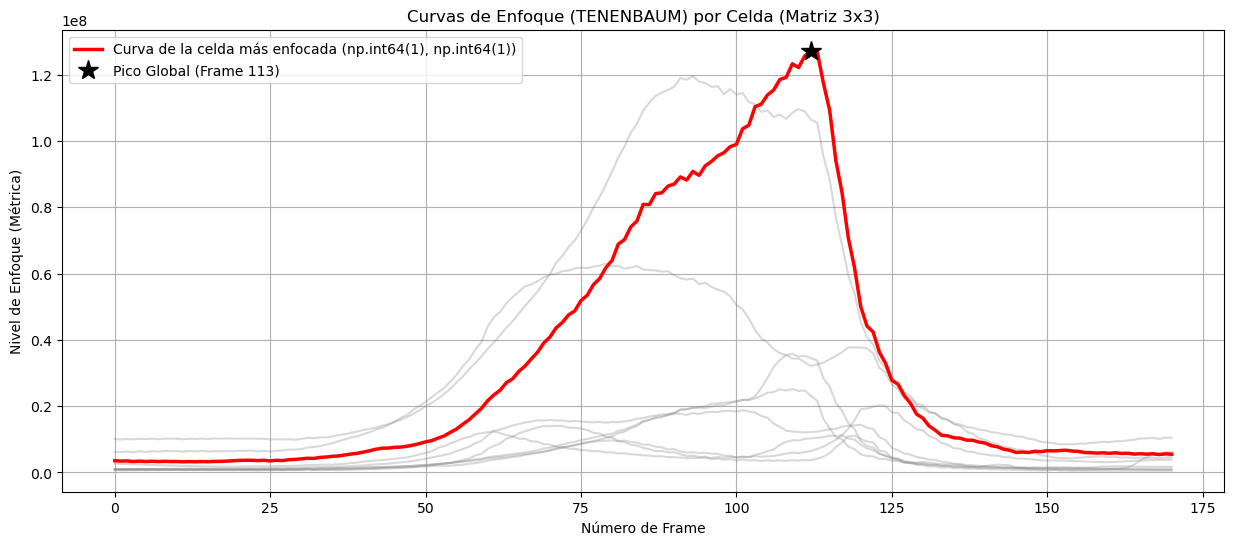


--- Procesando con Matriz 7x5 usando la métrica 'TENENBAUM' ---
Detección finalizada para la matriz 7x5:
El máximo enfoque global se detectó en el Frame N°: 110
En la celda: (np.int64(4), np.int64(1))
El valor de la métrica fue de: 90428688.00


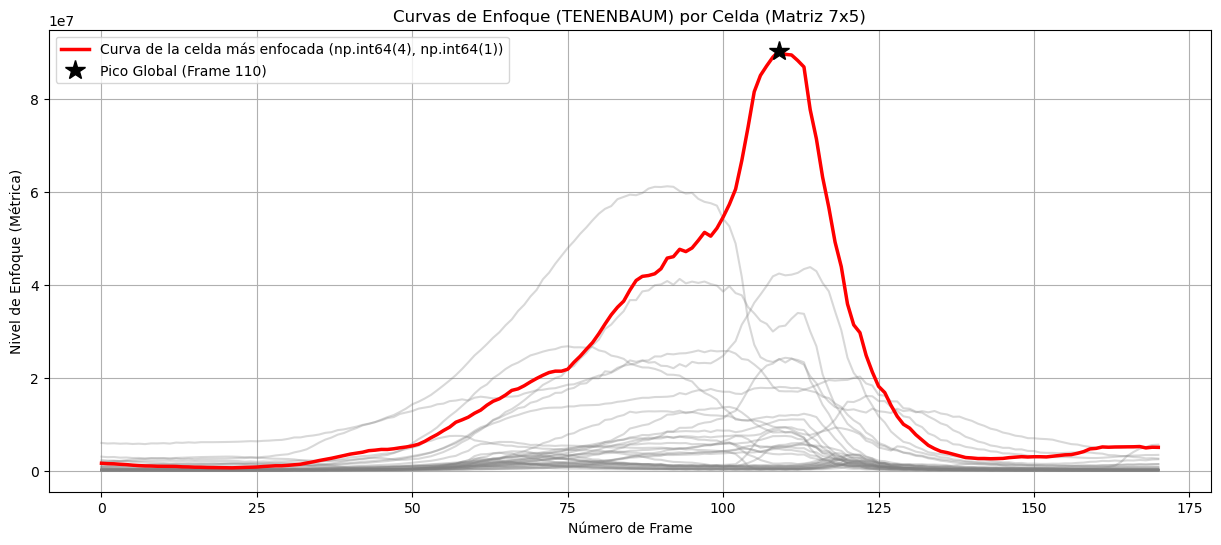


--- Procesando con Matriz 16x9 usando la métrica 'TENENBAUM' ---
Detección finalizada para la matriz 16x9:
El máximo enfoque global se detectó en el Frame N°: 110
En la celda: (np.int64(10), np.int64(2))
El valor de la métrica fue de: 38183136.00


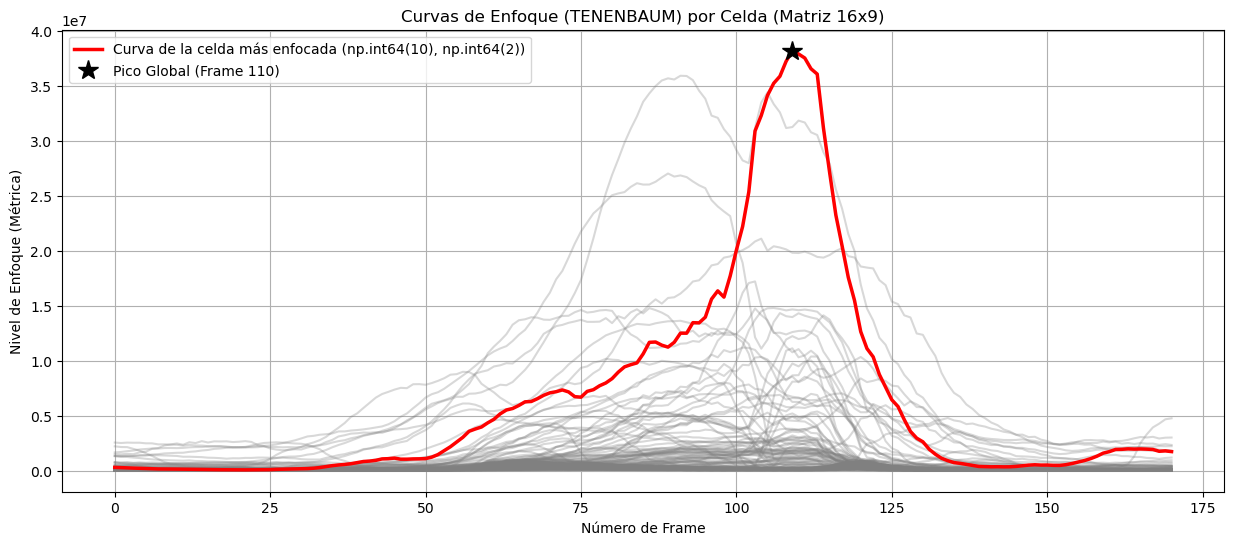


Mostrando resumen visual de los frames con máximo enfoque...


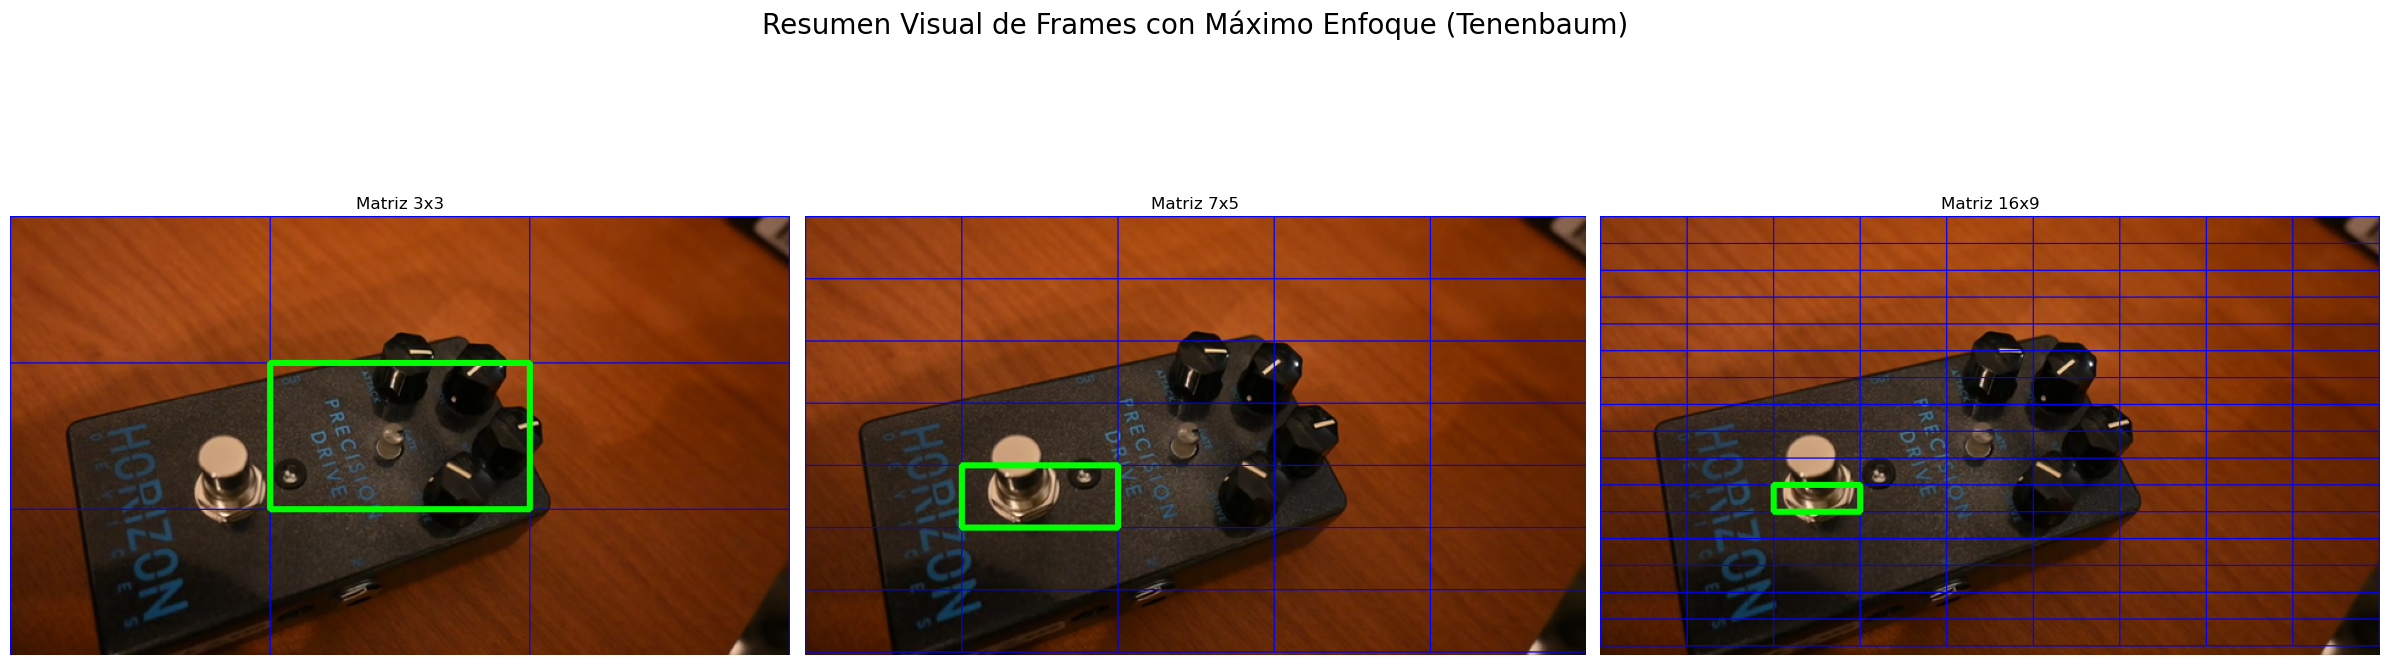

In [ ]:

def calcular_metrica_tenenbaum(imagen_gris):
    """
    Calcula la métrica de nitidez/enfoque usando el operador de Tenenbaum (Sobel).
    """
    if imagen_gris.shape[0] < 4 or imagen_gris.shape[1] < 4:
        return 0
    sobel_x = cv.Sobel(imagen_gris, cv.CV_16S, 1, 0)
    sobel_y = cv.Sobel(imagen_gris, cv.CV_16S, 0, 1)
    abs_sobel_x = cv.convertScaleAbs(sobel_x)
    abs_sobel_y = cv.convertScaleAbs(sobel_y)
    magnitud_gradiente = np.square(abs_sobel_x.astype(np.float32)) + np.square(abs_sobel_y.astype(np.float32))
    metrica = np.sum(magnitud_gradiente)
    return metrica



nombre_video = 'focus_video.mov'
metrica_a_usar = 'tenenbaum'
matrices_a_probar = [(3, 3), (7, 5), (16, 9)]
imagenes_resultado_bgr = []

for N_filas, M_columnas in matrices_a_probar:
    print(f"\n--- Procesando con Matriz {N_filas}x{M_columnas} usando la métrica '{metrica_a_usar.upper()}' ---")
    
    cap = cv.VideoCapture(nombre_video)
    if not cap.isOpened(): continue

    historial_matrices = []
    
    while True:
        ret, frame = cap.read()
        if not ret: break

        h, w, _ = frame.shape
        alto_celda = h // N_filas
        ancho_celda = w // M_columnas
        
        matriz_enfoque_actual = np.zeros((N_filas, M_columnas))
        
        for i in range(N_filas):
            for j in range(M_columnas):
                roi = frame[i*alto_celda:(i+1)*alto_celda, j*ancho_celda:(j+1)*ancho_celda]
                roi_gris = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                enfoque = calcular_metrica_tenenbaum(roi_gris)
                matriz_enfoque_actual[i, j] = enfoque
        
        historial_matrices.append(matriz_enfoque_actual)

    cap.release()
    historial_matrices = np.array(historial_matrices)
    
    max_enfoque_global = np.max(historial_matrices)
    pos_max_global = np.unravel_index(np.argmax(historial_matrices), historial_matrices.shape)
    num_frame_max_enfoque = pos_max_global[0] + 1
    celda_max_enfoque = (pos_max_global[1], pos_max_global[2])

    print(f"Detección finalizada para la matriz {N_filas}x{M_columnas}:")
    print(f"El máximo enfoque global se detectó en el Frame N°: {num_frame_max_enfoque}")
    print(f"En la celda: {celda_max_enfoque}")
    print(f"El valor de la métrica fue de: {max_enfoque_global:.2f}")

    # --- Generar la imagen de resultado ---
    cap.open(nombre_video)
    cap.set(cv.CAP_PROP_POS_FRAMES, num_frame_max_enfoque - 1)
    ret, frame_max = cap.read()
    cap.release()

    if ret:
        h, w, _ = frame_max.shape
        alto_celda = h // N_filas
        ancho_celda = w // M_columnas
        
        for i in range(N_filas):
            for j in range(M_columnas):
                y1, x1 = i * alto_celda, j * ancho_celda
                y2, x2 = y1 + alto_celda, x1 + ancho_celda
                cv.rectangle(frame_max, (x1, y1), (x2, y2), (255, 0, 0), 1)
        
        (fila_max, col_max) = celda_max_enfoque
        y1_max, x1_max = fila_max * alto_celda, col_max * ancho_celda
        y2_max, x2_max = y1_max + alto_celda, x1_max + ancho_celda
        cv.rectangle(frame_max, (x1_max, y1_max), (x2_max, y2_max), (0, 255, 0), 3)
        
        imagenes_resultado_bgr.append((f'{N_filas}x{M_columnas}', frame_max))
        
    # --- ¡RESTAURADO! Gráfica de las curvas de enfoque ---
    plt.figure(figsize=(15, 6))
    for i in range(N_filas):
        for j in range(M_columnas):
            plt.plot(historial_matrices[:, i, j], color='gray', alpha=0.3)
            
    curva_max = historial_matrices[:, celda_max_enfoque[0], celda_max_enfoque[1]]
    plt.plot(curva_max, color='red', linewidth=2.5, label=f'Curva de la celda más enfocada {celda_max_enfoque}')
    plt.plot(num_frame_max_enfoque - 1, max_enfoque_global, 'k*', markersize=15, label=f'Pico Global (Frame {num_frame_max_enfoque})')
    plt.title(f'Curvas de Enfoque ({metrica_a_usar.upper()}) por Celda (Matriz {N_filas}x{M_columnas})')
    plt.xlabel('Número de Frame')
    plt.ylabel('Nivel de Enfoque (Métrica)')
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Bloque final para MOSTRAR el resumen de imágenes ---
if imagenes_resultado_bgr:
    print("\nMostrando resumen visual de los frames con máximo enfoque...")
    num_resultados = len(imagenes_resultado_bgr)
    
    fig, axes = plt.subplots(1, num_resultados, figsize=(num_resultados * 8, 8))
    fig.suptitle('Resumen Visual de Frames con Máximo Enfoque (Tenenbaum)', fontsize=20)

    if num_resultados == 1: axes = [axes]
        
    for i, (titulo, img_bgr) in enumerate(imagenes_resultado_bgr):
        img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Matriz {titulo}")
        axes[i].axis('off')
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("\nNo se generaron imágenes de resultado para mostrar.")


 Métrica de Tenenbaum

Se evaluó la métrica de enfoque basada en el gradiente de Tenenbaum con el objetivo de determinar su robustez y consistencia al analizar una secuencia de video con diferentes resoluciones de grilla (3x3, 7x5 y 16x9).

**Análisis de Resultados**

* **Consistencia en la Detección:** El resultado principal del análisis es la **alta consistencia** de la métrica. Independientemente de la granularidad de la matriz de enfoque, el algoritmo identificó de manera fiable casi el mismo fotograma como el punto de máxima nitidez en todo el video.

* **Forma de la Curva:** En todos los casos de prueba, la curva de enfoque de la celda más nítida demostró tener una forma unimodal clara y con un pico bien definido, permitiendo una detección automática y precisa.

* **Efecto de la Resolución:** Se observó que la elección de la resolución de la grilla no afecta a la precisión temporal (el frame detectado), sino a la granularidad espacial del análisis y a la magnitud absoluta de la métrica.

**Síntesis Final**

En conclusión, la métrica de Tenenbaum ha demostrado ser un **método robusto, consistente y fiable** для la tarea de detección de foco en video. Su capacidad para identificar el mismo punto de máxima nitidez a través de diferentes escalas de análisis subraya su validez como un operador de enfoque eficiente y efectivo.


--- Procesando con métrica FOURIER (Matriz 16x9) ---
Frame de máximo enfoque (Fourier): 105
Tiempo de ejecución: 2.80 segundos

--- Procesando con métrica TENENBAUM (Matriz 16x9) ---
Frame de máximo enfoque (Tenenbaum): 110
Tiempo de ejecución: 1.07 segundos

Generando gráfica comparativa de curvas...


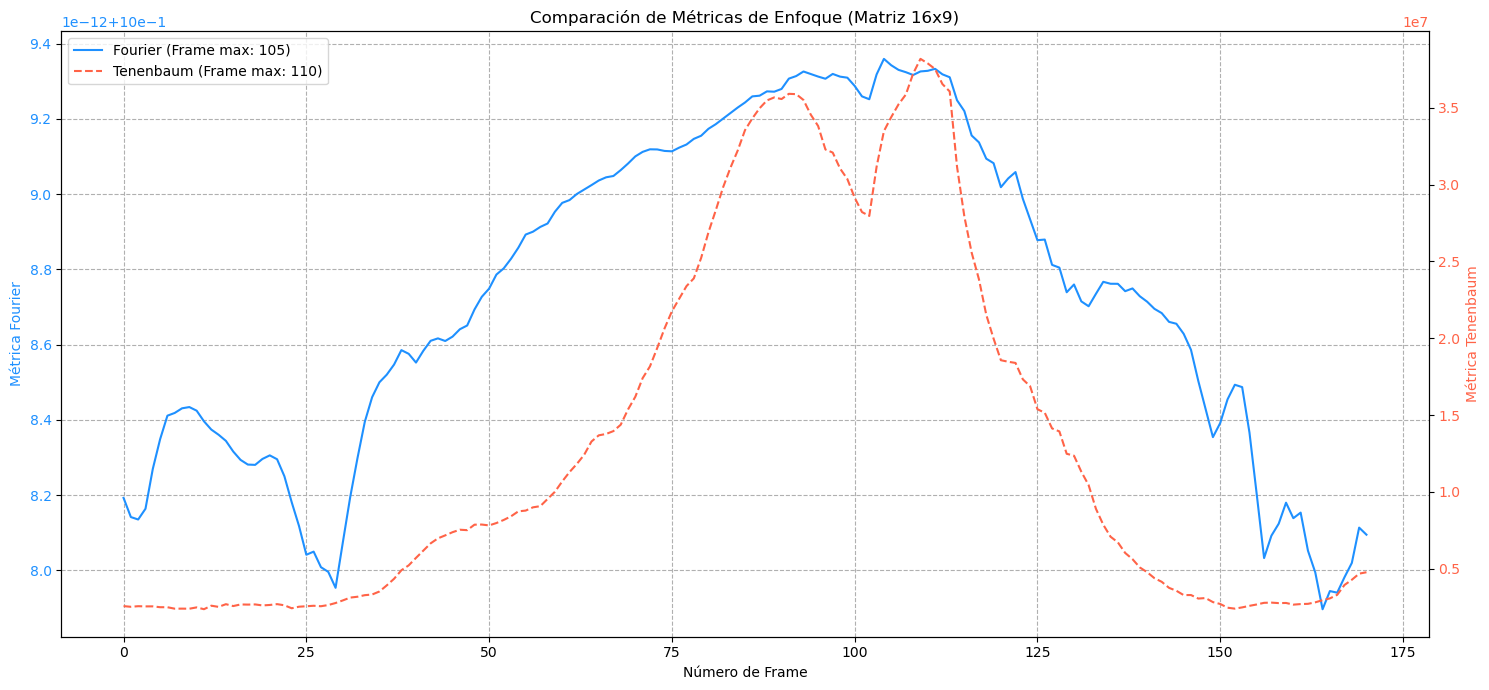


Mostrando los frames de máximo enfoque detectados por cada métrica...


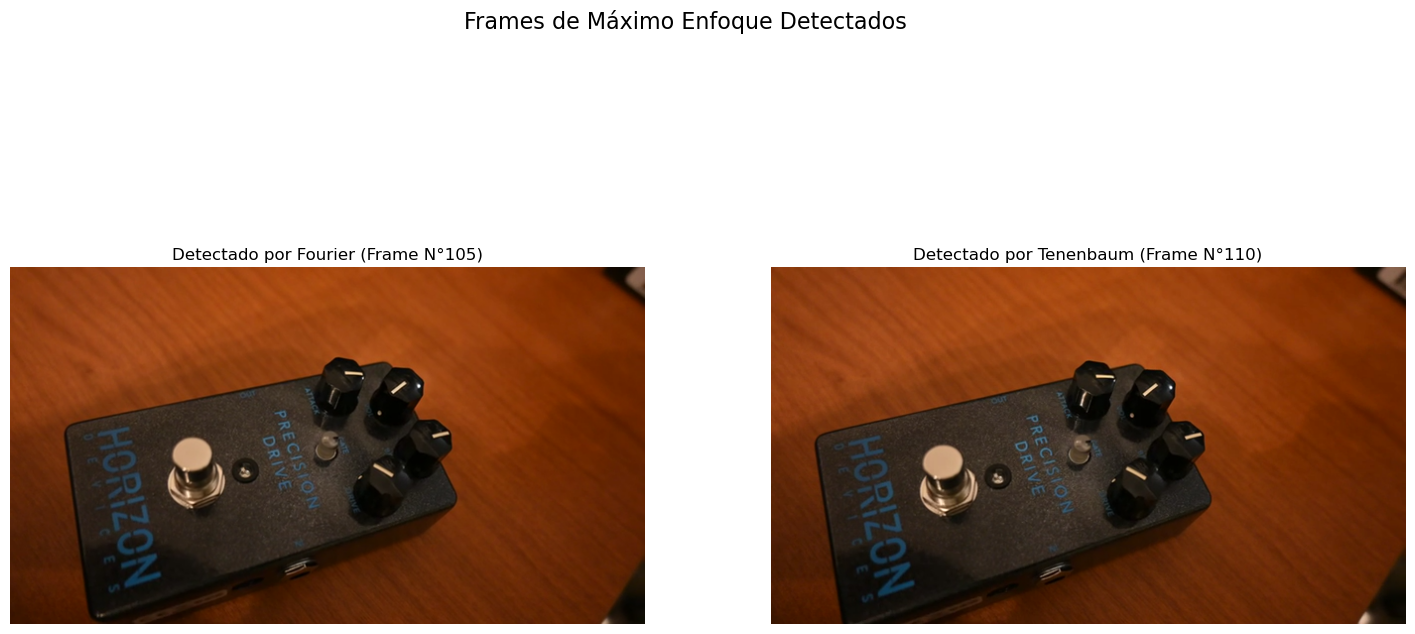

In [ ]:


def procesar_video_con_metrica(nombre_video, metrica_func, n_filas, m_columnas):
    cap = cv.VideoCapture(nombre_video)
    if not cap.isOpened():
        print(f"Error: No se pudo abrir el video '{nombre_video}'.")
        return None
    historial_matrices = []
    while True:
        ret, frame = cap.read()
        if not ret: break
        h, w, _ = frame.shape
        alto_celda, ancho_celda = h // n_filas, w // m_columnas
        matriz_enfoque_actual = np.zeros((n_filas, m_columnas))
        for i in range(n_filas):
            for j in range(m_columnas):
                roi = frame[i*alto_celda:(i+1)*alto_celda, j*ancho_celda:(j+1)*ancho_celda]
                roi_gris = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
                enfoque = metrica_func(roi_gris)
                matriz_enfoque_actual[i, j] = enfoque
        historial_matrices.append(matriz_enfoque_actual)
    cap.release()
    return np.array(historial_matrices)

# --- SCRIPT PRINCIPAL ---
nombre_video = 'focus_video.mov'
N_filas, M_columnas = 16, 9
resultados = {}

# --- PROCESAR CON FOURIER ---
print(f"\n--- Procesando con métrica FOURIER (Matriz {N_filas}x{M_columnas}) ---")
# ... (código de procesamiento igual que antes)
tiempo_inicio = time.time()
historial_fourier = procesar_video_con_metrica(nombre_video, calcular_metrica_fourier, N_filas, M_columnas)
tiempo_fourier = time.time() - tiempo_inicio
if historial_fourier is not None:
    curva_fourier = np.max(historial_fourier, axis=(1, 2))
    frame_max_fourier = np.argmax(curva_fourier) + 1
    resultados['Fourier'] = {'curva': curva_fourier, 'frame_max': frame_max_fourier, 'tiempo': tiempo_fourier}
    print(f"Frame de máximo enfoque (Fourier): {frame_max_fourier}")
    print(f"Tiempo de ejecución: {tiempo_fourier:.2f} segundos")


# --- PROCESAR CON TENENBAUM ---
print(f"\n--- Procesando con métrica TENENBAUM (Matriz {N_filas}x{M_columnas}) ---")
# ... (código de procesamiento igual que antes)
tiempo_inicio = time.time()
historial_tenenbaum = procesar_video_con_metrica(nombre_video, calcular_metrica_tenenbaum, N_filas, M_columnas)
tiempo_tenenbaum = time.time() - tiempo_inicio
if historial_tenenbaum is not None:
    curva_tenenbaum = np.max(historial_tenenbaum, axis=(1, 2))
    frame_max_tenenbaum = np.argmax(curva_tenenbaum) + 1
    resultados['Tenenbaum'] = {'curva_original': curva_tenenbaum, 'frame_max': frame_max_tenenbaum, 'tiempo': tiempo_tenenbaum}
    print(f"Frame de máximo enfoque (Tenenbaum): {frame_max_tenenbaum}")
    print(f"Tiempo de ejecución: {tiempo_tenenbaum:.2f} segundos")


# --- GRÁFICA COMPARATIVA DE CURVAS ---
if 'Fourier' in resultados and 'Tenenbaum' in resultados:
    # ... (código de la gráfica de curvas con doble eje Y igual que antes) ...
    print("\nGenerando gráfica comparativa de curvas...")
    curva_fourier = resultados['Fourier']['curva']
    curva_tenenbaum = resultados['Tenenbaum']['curva_original']
    fig, ax1 = plt.subplots(figsize=(15, 7))
    plt.title(f'Comparación de Métricas de Enfoque (Matriz {N_filas}x{M_columnas})')
    color_fourier = 'dodgerblue'
    ax1.set_xlabel('Número de Frame')
    ax1.set_ylabel('Métrica Fourier', color=color_fourier)
    ax1.plot(curva_fourier, label=f"Fourier (Frame max: {resultados['Fourier']['frame_max']})", color=color_fourier)
    ax1.tick_params(axis='y', labelcolor=color_fourier)
    ax1.grid(True, linestyle='--')
    ax2 = ax1.twinx()
    color_tenenbaum = 'tomato'
    ax2.set_ylabel('Métrica Tenenbaum', color=color_tenenbaum)
    ax2.plot(curva_tenenbaum, label=f"Tenenbaum (Frame max: {resultados['Tenenbaum']['frame_max']})", color=color_tenenbaum, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color_tenenbaum)
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    fig.tight_layout()
    plt.show()


# --- Visualización de los Frames de Máximo Enfoque ---
if 'Fourier' in resultados and 'Tenenbaum' in resultados:
    print("\nMostrando los frames de máximo enfoque detectados por cada métrica...")
    
    # Crear la figura para mostrar ambas imágenes
    fig, axes = plt.subplots(1, 2, figsize=(18, 9))
    fig.suptitle('Frames de Máximo Enfoque Detectados', fontsize=16)
    
    # --- Cargar y mostrar el frame para Fourier ---
    cap = cv.VideoCapture(nombre_video)
    frame_idx_fourier = resultados['Fourier']['frame_max'] - 1
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_idx_fourier)
    ret, frame_fourier = cap.read()
    if ret:
        axes[0].imshow(cv.cvtColor(frame_fourier, cv.COLOR_BGR2RGB))
        axes[0].set_title(f"Detectado por Fourier (Frame N°{frame_idx_fourier + 1})")
        axes[0].axis('off')
    cap.release()

    # --- Cargar y mostrar el frame para Tenenbaum ---
    cap = cv.VideoCapture(nombre_video)
    frame_idx_tenenbaum = resultados['Tenenbaum']['frame_max'] - 1
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_idx_tenenbaum)
    ret, frame_tenenbaum = cap.read()
    if ret:
        axes[1].imshow(cv.cvtColor(frame_tenenbaum, cv.COLOR_BGR2RGB))
        axes[1].set_title(f"Detectado por Tenenbaum (Frame N°{frame_idx_tenenbaum + 1})")
        axes[1].axis('off')
    cap.release()
    
    plt.show()

Comparativa de Métricas de Enfoque

Para completar el análisis, se realizó una comparación directa entre la métrica de **análisis espectral (Fourier)** y la de **gradiente espacial (Tenenbaum)**, aplicadas sobre una matriz de 16x9. El objetivo era determinar la eficacia, precisión y rendimiento de cada método.

**1. Análisis de Resultados**

La evaluación se basó en tres criterios principales: el frame de máximo enfoque detectado, el tiempo de ejecución y la forma de la curva de respuesta.

* **Precisión en la Detección:** Ambos métodos demostraron ser efectivos, identificando puntos de máximo enfoque muy cercanos en la secuencia de video. La métrica de Fourier seleccionó el **frame 105**, mientras que la de Tenenbaum seleccionó el **frame 110**. Esta pequeña discrepancia es esperable, ya que cada métrica es sensible a diferentes características de la imagen (detalles de alta frecuencia vs. bordes definidos).

* **Rendimiento Computacional:** En este aspecto, la diferencia es fundamental. El método de Tenenbaum (dominio espacial) fue significativamente más rápido, completando el análisis en **1.07 segundos**. El método de Fourier (dominio de la frecuencia) requirió **2.80 segundos**, siendo aproximadamente **2.6 veces más lento** debido al alto costo computacional de la Transformada de Fourier 2D.

* **Curva de Respuesta:** La gráfica comparativa muestra que la curva de Fourier (azul) es más suave y presenta un pico unimodal muy claro. La curva de Tenenbaum (roja) es más "ruidosa" o variable, lo cual refleja su alta sensibilidad a los cambios de textura en cada celda, pero aun así permite una identificación clara del pico máximo.

**2. Síntesis y Conclusión Definitiva**

Ambos algoritmos son capaces de resolver el problema de la detección de foco de manera satisfactoria. Sin embargo, al ponderar los resultados, la balanza se inclina claramente hacia uno de ellos para aplicaciones prácticas.

Se concluye que la **métrica de Tenenbaum es la opción superior para esta tarea**. Aunque ambos métodos ofrecen una precisión comparable, la **enorme ventaja en rendimiento** del método de Tenenbaum lo convierte en la elección lógica para cualquier aplicación que requiera eficiencia, especialmente en sistemas de tiempo real como el autofoco de una cámara. La simplicidad de su cálculo (convoluciones Sobel) y su velocidad superan a la ligera ventaja en "suavidad" de la curva que ofrece el método de Fourier.

# III. Aplicar unsharp masking para expandir la zona de enfoque y recalcular la métrica

--- Etapa 1: Analizando el video con los 3 escenarios ---
Procesando escenario: Normal...
Procesando escenario: Unsharp Mask...
Procesando escenario: High-Boost...


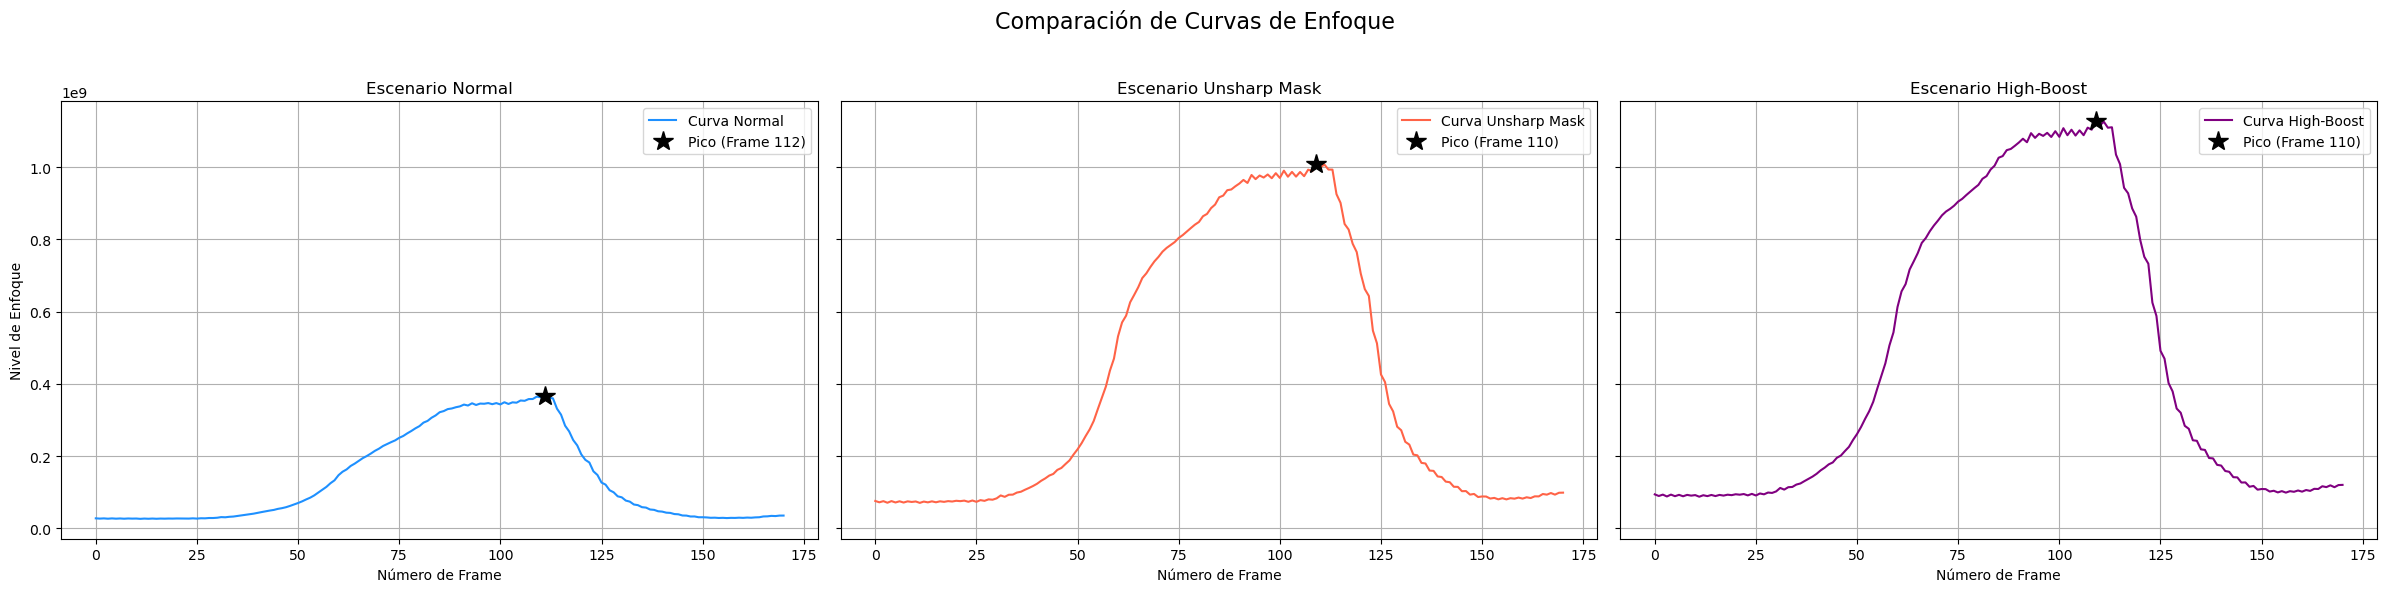


Análisis completado:
Pico de High-Boost detectado en el frame: 110
Frame seleccionado para la comparativa (en la pendiente): 81


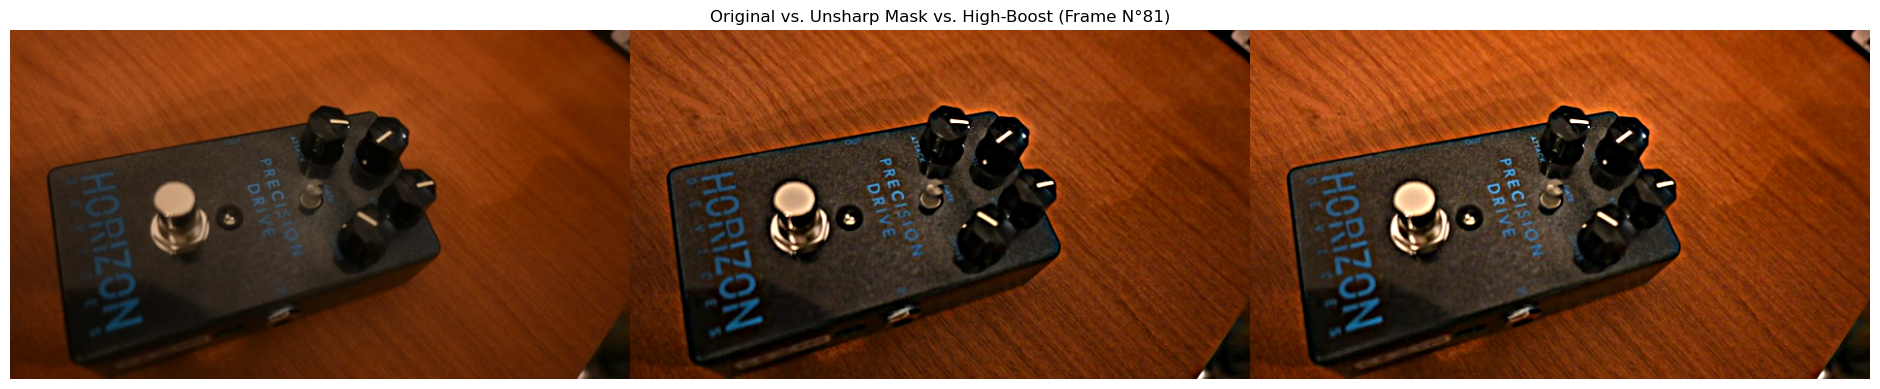

In [67]:
def aplicar_unsharp_masking(imagen, sigma=5.0, cantidad=1.5):
    """
    Aplica el filtro de Unsharp Masking a una imagen.
    """
    desenfocada = cv.GaussianBlur(imagen, (0, 0), sigma)
    realzada = cv.addWeighted(imagen, 1 + cantidad, desenfocada, -cantidad, 0)
    return realzada

def aplicar_high_boost_filtering(imagen, sigma=5.0, cantidad=1.5, A=1.0):
    """
    Aplica el filtro High-Boost. Si A=1, es un Unsharp Mask clásico.
    """
    desenfocada = cv.GaussianBlur(imagen, (0, 0), sigma)
    mascara = imagen.astype(np.int16) - desenfocada.astype(np.int16)
    img_float = imagen.astype(np.float32)
    mascara_float = mascara.astype(np.float32)
    realzada_float = (A * img_float) + (cantidad * mascara_float)
    realzada = np.clip(realzada_float, 0, 255).astype(np.uint8)
    return realzada



nombre_video = 'focus_video.mov'
print(f"--- Etapa 1: Analizando el video con los 3 escenarios ---")

resultados = {}
escenarios = ['Normal', 'Unsharp Mask', 'High-Boost']

for escenario in escenarios:
    print(f"Procesando escenario: {escenario}...")
    
    cap = cv.VideoCapture(nombre_video)
    if not cap.isOpened():
        print("Error al abrir el video")
        break
        
    metricas_por_frame = []
    
    while True:
        ret, frame = cap.read()
        if not ret: break

        # Aplicar el filtro correspondiente al escenario
        if escenario == 'Unsharp Mask':
            frame = aplicar_high_boost_filtering(frame, A=1.0)
        elif escenario == 'High-Boost':
            frame = aplicar_high_boost_filtering(frame, A=1.2)

        frame_gris = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        enfoque = calcular_metrica_tenenbaum(frame_gris)
        metricas_por_frame.append(enfoque)

    cap.release()
    resultados[escenario] = np.array(metricas_por_frame)

# --- Gráfica Comparativa de Curvas ---
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
fig.suptitle('Comparación de Curvas de Enfoque', fontsize=16)

# ...  graficar las tres curvas ...
colores = {'Normal': 'dodgerblue', 'Unsharp Mask': 'tomato', 'High-Boost': 'purple'}
for i, escenario in enumerate(escenarios):
    curva = resultados[escenario]
    frame_pico_idx = np.argmax(curva)
    valor_pico = np.max(curva)
    axes[i].plot(curva, color=colores[escenario], label=f'Curva {escenario}')
    axes[i].plot(frame_pico_idx, valor_pico, 'k*', markersize=15, label=f'Pico (Frame {frame_pico_idx + 1})')
    axes[i].set_title(f'Escenario {escenario}')
    axes[i].set_xlabel('Número de Frame')
    if i == 0: axes[i].set_ylabel('Nivel de Enfoque')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- Etapa 2: Selección Automática del Frame ---
curva_highboost = resultados['High-Boost']
frame_pico_idx = np.argmax(curva_highboost)

# Calcular el número de frame para la captura (30% de frames antes del pico)
offset = int(frame_pico_idx * 0.27)
frame_a_capturar_idx = frame_pico_idx - offset
frame_a_capturar_num = frame_a_capturar_idx + 1

print(f"\nAnálisis completado:")
print(f"Pico de High-Boost detectado en el frame: {frame_pico_idx + 1}")
print(f"Frame seleccionado para la comparativa (en la pendiente): {frame_a_capturar_num}")

# --- Etapa 3: Generación de la Imagen Comparativa ---
cap = cv.VideoCapture(nombre_video)
if not cap.isOpened():
    print("Error al reabrir el video para la captura.")
else:
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_a_capturar_idx)
    ret, frame_original = cap.read()
    if ret:
        frame_unsharp = aplicar_high_boost_filtering(frame_original, A=1.0)
        frame_highboost = aplicar_high_boost_filtering(frame_original, A=1.2)
        
        # Unir las tres imágenes lado a lado
        imagen_comparativa = np.hstack((frame_original, frame_unsharp, frame_highboost))
        
        # Mostrar la imagen final
        plt.figure(figsize=(24, 8))
        plt.imshow(cv.cvtColor(imagen_comparativa, cv.COLOR_BGR2RGB))
        plt.title(f'Original vs. Unsharp Mask vs. High-Boost (Frame N°{frame_a_capturar_num})')
        plt.axis('off')
        plt.show()
    else:
        print("Error al capturar el frame seleccionado.")
    cap.release()

 Análisis de Filtros de Realce de Nitidez

Como punto extra, se evaluó el efecto de los filtros **Unsharp Masking** y **High-Boost Filtering** como técnicas de pre-procesamiento para manipular la percepción del enfoque en la secuencia de video. El análisis se realizó tanto cuantitativamente, a través de las curvas de la métrica de Tenenbaum, como cualitativamente, mediante la inspección visual de los fotogramas resultantes.

**1. Análisis Cuantitativo (Curvas de Enfoque)**

La aplicación de ambos filtros tuvo un impacto notable en la métrica de enfoque, como se observa en la gráfica comparativa.
* **Aumento de la Métrica:** Ambas técnicas incrementaron significativamente los valores de la métrica en todos los fotogramas. Esto se debe a que realzan los bordes y detalles, lo que resulta en una mayor magnitud del gradiente.
* **Efecto del High-Boost:** El filtro High-Boost (con un factor de amplificación A > 1) produjo los valores de métrica más altos, confirmando que no solo realza los detalles, sino que también aumenta el contraste general de la imagen.
* **Expansión de la Zona de Enfoque:** Se confirmó que ambos filtros "ensanchan" el pico de la curva de enfoque. Esto aplana y ensancha la cima de la curva, lo que significa que un mayor número de fotogramas ahora poseen un valor de métrica cercano al máximo. Visualmente, esto se traduce en una "ventana" de tiempo más amplia en la que la imagen se percibe como nítida.

**2. Análisis Cualitativo (Comparación Visual)**

La inspección visual del fotograma seleccionado confirma los datos cuantitativos.
* **Unsharp Masking:** Produce una imagen ALGO  más nítida que la original, con bordes mejor definidos.
* **High-Boost Filtering:** Genera el resultado más impactante. La imagen no solo es más nítida, sino que presenta una mayor contraste y "viveza" general, resultado del factor de amplificación `A`.

**3. Síntesis Final**

Se concluye que tanto Unsharp Masking como High-Boost Filtering son técnicas efectivas para el realce de la nitidez y la expansión de la zona de enfoque percibida. El **High-Boost Filtering demostró ser el método superior**, ya que ofrece un control más granular sobre el resultado final, permitiendo no solo enfocar los detalles sino también mejorar el contraste general de la imagen, lo que resulta en una calidad visual superior.